In [146]:
import time
import subprocess as subp
import os

import matplotlib.pyplot as plt
import numpy as np

In [153]:
text_samples = [
    #("dna", ["dna.3MB", "dna.25MB", "dna.50MB", "dna.100MB"]),
    ("english", ["english.26KB.idx", "english.400KB.idx", "english.1MB.idx", "english.2MB.idx", "english.3MB.idx", "english.6MB.idx", "english.13MB.idx"])
]

In [154]:
data = {}

for (topic, text_file_list) in text_samples:

    y_time_grep = []
    y_time_ipmt = []

    for text_file in text_file_list:
        
        text_file =  text_file
        print(text_file[0:len(text_file)-4])
        t1 = time.time()
        subp.call(["grep", "-c", "hellish", text_file[0:len(text_file)-4]])
        t2 = time.time()
        y_time_grep.append(t2 - t1)

        t1 = time.time()
        subp.check_call(["ipmt", "search", "-c", "hellish", text_file])
        t2 = time.time()
        y_time_ipmt.append(t2 - t1)
    
    data[topic] = {
        "y_time_grep"    : y_time_grep,
        "y_time_ipmt"   : y_time_ipmt
    }

english.26KB
0
0
english.400KB
0
0
english.1MB
0
0
english.2MB
0
0
english.3MB
1
1
english.6MB
1
1
english.13MB
5
5


In [155]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

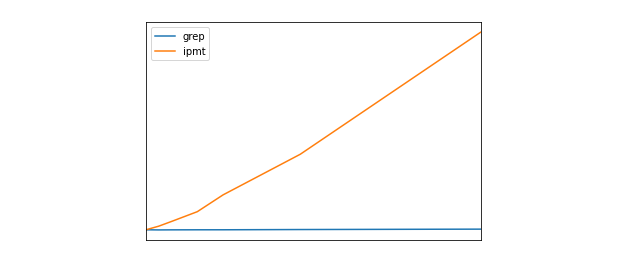

In [156]:
for topic_key in data:
    topic_data = data[topic_key]

    y_time_grep = topic_data["y_time_grep"]
    y_time_ipmt = topic_data["y_time_ipmt"]
    # plot - Time efficiency
    fig, ax = plt.subplots()
    
    x = [0.026, 0.5, 1, 2, 3, 6, 13]

    ax.plot(x, y_time_grep, label='grep')
    ax.plot(x, y_time_ipmt, label='ipmt')

    ax.set(xlim=(0.026, 13), xticks=np.arange(0, 13, 3))

    plt.title(f"tempo casamento exato de acordo com o tamanho do texto e um alfabeto constante grande: {topic_key}")
    plt.xlabel("Tamanho do arquivo em MBs")
    plt.ylabel("Tempo de casamento exato")

    plt.legend(labelcolor='black', loc='best')
    plt.show()